###setup

In [1]:
%matplotlib inline

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import thunder
from showit import image, tile
import matplotlib.animation as animation

In [4]:
from os.path import join, exists
from os import mkdir, makedirs

In [5]:
from numpy import save

###set directory and session information

In [6]:
directory = '/tier2/freeman/Nick/lfov.calibration'

In [7]:
key = '2016-03-18'
name = 'anm-0330549'

In [8]:
path = join(directory, 'processed', name, key)
print exists(path)

True


In [9]:
pixelsPerUm = 600.0/512

###create savepath

In [10]:
if not exists(join(path, 'summary')):
    makedirs(join(path, 'summary'))

###load data

In [11]:
data = thunder.images.frombinary(join(path, 'registered'), engine=sc)

In [12]:
data.cache();

###mean image

In [13]:
mean = data.mean().toarray()

In [14]:
save(join(path, 'summary','mean.npy'), mean)

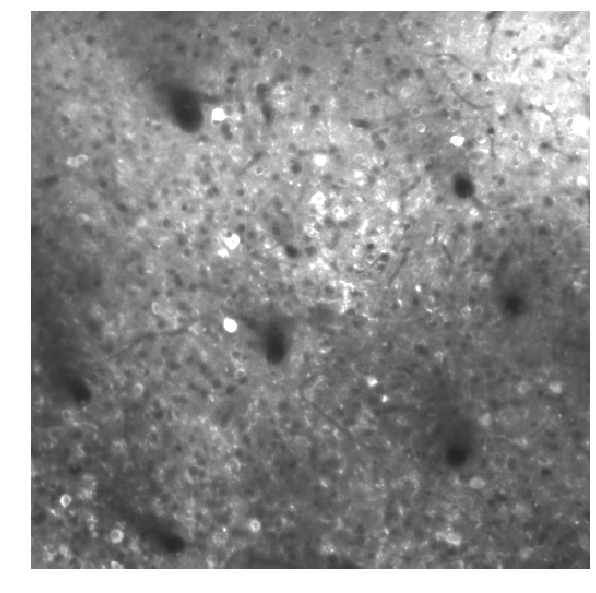

In [25]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(mean[3,:,:], clim=(0, 200), ax=ax)

###standard deviation image

In [28]:
std = data.std().toarray()

In [29]:
save(join(path, 'summary','std.npy'), std)

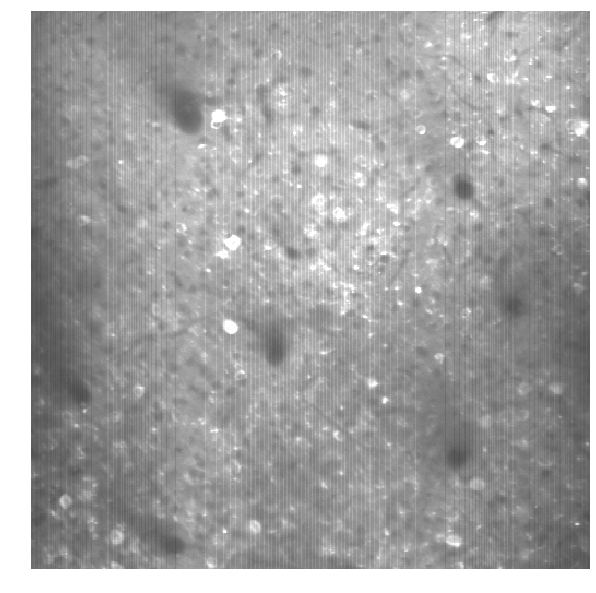

In [30]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(std[3,:,:], clim=(0, 200), ax=ax)

###maximum image

In [31]:
maximum = data.max().toarray()

In [32]:
save(join(path, 'summary','maximum.npy'), maximum)

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(maximum[3,:,:], clim=(0, 7000), ax=ax)

###local corr image

In [ ]:
localCorr = data.localcorr(4)

In [ ]:
save(join(path, 'summary','localCorr.npy'), localCorr)

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(localCorr[3,:,:], clim=(0, .4), ax=ax)

In [27]:
scale = mean[:,100:200,200:300].mean(axis=2).mean(axis=1)
scale = [scale.max()/x for x in scale]
rescaled = array([mean[i]*scale[i] for i in range(mean.shape[0])])

In [28]:
from skimage.io import imsave

In [30]:
imsave(join(path, 'summary', 'mean.tif'), rescaled.astype('float32'),
       plugin='tifffile', photometric='minisblack')